<a href="https://colab.research.google.com/github/shivani983/computer-vision-handson/blob/main/image_classification_pytorch_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Apr 17 02:27:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch

In [3]:
torch.__version__

'2.6.0+cu124'

In [10]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torchvision.transforms import ToTensor,Lambda,Compose
import matplotlib.pyplot as plt


In [5]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/cv_handson")

In [6]:
%ls

image_classification_pytorch.ipynb  sports.zip


In [8]:
!unzip /content/drive/MyDrive/Colab_Notebooks/cv_handson/sports.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/rings/022.jpg     
  inflating: train/rings/023.jpg     
  inflating: train/rings/024.jpg     
  inflating: train/rings/025.jpg     
  inflating: train/rings/026.jpg     
  inflating: train/rings/027.jpg     
  inflating: train/rings/028.jpg     
  inflating: train/rings/029.jpg     
  inflating: train/rings/030.jpg     
  inflating: train/rings/031.jpg     
  inflating: train/rings/032.jpg     
  inflating: train/rings/033.jpg     
  inflating: train/rings/034.jpg     
  inflating: train/rings/035.jpg     
  inflating: train/rings/036.jpg     
  inflating: train/rings/037.jpg     
  inflating: train/rings/038.jpg     
  inflating: train/rings/039.jpg     
  inflating: train/rings/040.jpg     
  inflating: train/rings/041.jpg     
  inflating: train/rings/042.jpg     
  inflating: train/rings/043.jpg     
  inflating: train/rings/044.jpg     
  inflating: train/rings/045.jpg     
  inflating: train/rings/046.jpg     

In [11]:
# loading the data

# Define transforms (standard for pretrained models like ResNet/VGG)
transform = transforms.Compose([
    transforms.Resize(256),                # Resize shortest side to 256
    transforms.CenterCrop(224),            # Crop to 224x224
    transforms.ToTensor(),                 # Convert to tensor
    transforms.Normalize(                  # Normalize to ImageNet stats
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])
training_data = datasets.ImageFolder(
    root='/content/drive/MyDrive/Colab_Notebooks/cv_handson/train',
    transform = transform,
)

testing_data = datasets.ImageFolder(
    root = '/content/drive/MyDrive/Colab_Notebooks/cv_handson/test',
    transform = transform
)


In [14]:
# Dataloaders
train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
test_loader = DataLoader(testing_data, batch_size=32, shuffle=False)

In [15]:
# Check the classes
print("Classes:", training_data.classes)

Classes: ['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam', 'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx', 'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading', 'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey', 'figure skating men', 'figure skating pairs', 'figure skating women', 'fly fishing', 'football', 'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding', 'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching', 'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting', 'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing', 'olympic wrestling', 'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo', 'pommel horse', 'rings', 'rock climbing',

In [20]:
len(training_data.classes)

100

In [17]:
training_data

Dataset ImageFolder
    Number of datapoints: 13492
    Root location: /content/drive/MyDrive/Colab_Notebooks/cv_handson/train
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [18]:
for x,y in test_loader:
  print(x,y)

tensor([[[[-0.9363, -0.7308, -0.5767,  ..., -0.8849, -0.8678, -0.9534],
          [-1.0390, -0.8164, -0.6281,  ..., -0.9192, -0.9363, -0.9363],
          [-1.1932, -0.7822, -0.6281,  ..., -0.9020, -0.9192, -0.8849],
          ...,
          [ 0.8618,  0.8961,  0.9132,  ..., -1.6727, -1.7069, -1.7412],
          [ 0.8789,  0.9132,  0.9132,  ..., -1.6727, -1.6898, -1.7240],
          [ 0.9132,  0.9474,  0.9132,  ..., -1.7069, -1.7240, -1.7412]],

         [[-1.0028, -0.7752, -0.6176,  ..., -0.5476, -0.5301, -0.6352],
          [-1.1253, -0.8803, -0.6877,  ..., -0.5826, -0.6001, -0.6176],
          [-1.3354, -0.8627, -0.7227,  ..., -0.5826, -0.6001, -0.5826],
          ...,
          [ 0.9405,  0.9755,  1.0105,  ..., -1.6331, -1.6331, -1.6506],
          [ 0.9405,  0.9755,  1.0105,  ..., -1.6331, -1.6331, -1.6681],
          [ 0.9755,  1.0105,  0.9930,  ..., -1.6681, -1.6681, -1.6856]],

         [[-0.9504, -0.7413, -0.6018,  ...,  0.6356,  0.6356,  0.4439],
          [-1.1073, -0.8458, -

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [26]:
# define our ANN model

class NeuralNetworks(nn.Module):
  def __init__(self):
    super(NeuralNetworks,self).__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(3*224*224,512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.ReLU(),
        nn.Linear(512,100)
    )



  def forward(self,x):
     x = self.flatten(x)
     logits = self.linear_relu_stack(x)
     return logits


In [27]:
model  = NeuralNetworks().to(device)
print(model)

NeuralNetworks(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=150528, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=100, bias=True)
  )
)


In [28]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr =1e-3)


In [29]:
# training loop

def train(dataloader, model,loss_fn,optimizer):
  size = len(dataloader.dataset)

  model.train()
  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device), y.to(device)

    # compute prediction error
    pred = model(X)
    loss = loss_fn(pred,y)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 100 ==0:
      loss, current = loss.item(), batch*len(X)
      print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

In [32]:
def test(dataloader,model,loss_fn):
  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  model.eval()
  test_loss,correct = 0,0
  with torch.no_grad():
    for X,y in dataloader:
      X,y = X.to(device), y.to(device)
      pred = model(X)
      test_loss += loss_fn(pred,y).item()

      correct += (pred.argmax(1) == y).type(torch.float).sum().item()

  test_loss /= num_batches
  correct /=size

  print(f"test error : \n Accuracy : {(100*correct):>0.1f}%,Avg loss: {test_loss:8f} \n")


In [35]:
# start training

epochs = 11

for t in range(epochs):
  print(f"Epoch {t+1}\n--------------------->")
  train(train_loader,model,loss_fn,optimizer)
  test(test_loader,model,loss_fn)

print("Done!")

Epoch 1
--------------------->
loss: 0.206916 [    0/13492]
loss: 0.442620 [ 3200/13492]
loss: 0.457309 [ 6400/13492]
loss: 0.299099 [ 9600/13492]
loss: 0.321762 [12800/13492]
test error : 
 Accuracy : 27.6%,Avg loss: 3.362972 

Epoch 2
--------------------->
loss: 0.295982 [    0/13492]
loss: 0.192119 [ 3200/13492]
loss: 0.206990 [ 6400/13492]
loss: 0.321326 [ 9600/13492]
loss: 0.341427 [12800/13492]
test error : 
 Accuracy : 28.6%,Avg loss: 3.364015 

Epoch 3
--------------------->
loss: 0.342751 [    0/13492]
loss: 0.323405 [ 3200/13492]
loss: 0.272619 [ 6400/13492]
loss: 0.313025 [ 9600/13492]
loss: 0.201403 [12800/13492]
test error : 
 Accuracy : 28.0%,Avg loss: 3.409974 

Epoch 4
--------------------->
loss: 0.235312 [    0/13492]
loss: 0.260375 [ 3200/13492]
loss: 0.283285 [ 6400/13492]
loss: 0.230081 [ 9600/13492]
loss: 0.302029 [12800/13492]
test error : 
 Accuracy : 29.4%,Avg loss: 3.407443 

Epoch 5
--------------------->
loss: 0.264539 [    0/13492]
loss: 0.217347 [ 3200/13

In [36]:
# save the model

torch.save(model.state_dict(),"ANN_image_model.pth")
print("model saved!")

model saved!


In [37]:
# load the model

model = NeuralNetworks()
model.load_state_dict(torch.load("ANN_image_model.pth"))


<All keys matched successfully>

In [38]:
# Prediction classes:

classes = ['air hockey', 'ampute football', 'archery', 'arm wrestling', 'axe throwing', 'balance beam',
           'barell racing', 'baseball', 'basketball', 'baton twirling', 'bike polo', 'billiards', 'bmx',
           'bobsled', 'bowling', 'boxing', 'bull riding', 'bungee jumping', 'canoe slamon', 'cheerleading',
           'chuckwagon racing', 'cricket', 'croquet', 'curling', 'disc golf', 'fencing', 'field hockey',
           'figure skating men', 'figure skating pairs', 'figure skating women', 'fly fishing', 'football',
           'formula 1 racing', 'frisbee', 'gaga', 'giant slalom', 'golf', 'hammer throw', 'hang gliding',
           'harness racing', 'high jump', 'hockey', 'horse jumping', 'horse racing', 'horseshoe pitching',
           'hurdles', 'hydroplane racing', 'ice climbing', 'ice yachting', 'jai alai', 'javelin', 'jousting',
           'judo', 'lacrosse', 'log rolling', 'luge', 'motorcycle racing', 'mushing', 'nascar racing',
           'olympic wrestling', 'parallel bar', 'pole climbing', 'pole dancing', 'pole vault', 'polo',
           'pommel horse', 'rings', 'rock climbing', 'roller derby', 'rollerblade racing', 'rowing',
           'rugby', 'sailboat racing', 'shot put', 'shuffleboard', 'sidecar racing', 'ski jumping',
           'sky surfing', 'skydiving', 'snow boarding', 'snowmobile racing', 'speed skating',
           'steer wrestling', 'sumo wrestling', 'surfing', 'swimming', 'table tennis', 'tennis',
           'track bicycle', 'trapeze', 'tug of war', 'ultimate', 'uneven bars', 'volleyball',
           'water cycling', 'water polo', 'weightlifting', 'wheelchair basketball', 'wheelchair racing',
           'wingsuit flying']




In [39]:
classes[0]

'air hockey'

In [40]:
len(classes)


100

In [41]:
model.eval()

NeuralNetworks(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=150528, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=100, bias=True)
  )
)

In [42]:
x, y = testing_data[0][0],testing_data[0][1]

In [47]:
with torch.no_grad():
  x = x.unsqueeze(0)               # [1, 3, 224, 224]
  print(x.shape)
  pred = model(x)
  predicted,actual = classes[pred[0].argmax(0)],classes[y]
  print(f"predicted: '{predicted}'. Actual: '{actual}'")

torch.Size([1, 3, 224, 224])
predicted: 'shot put'. Actual: 'air hockey'


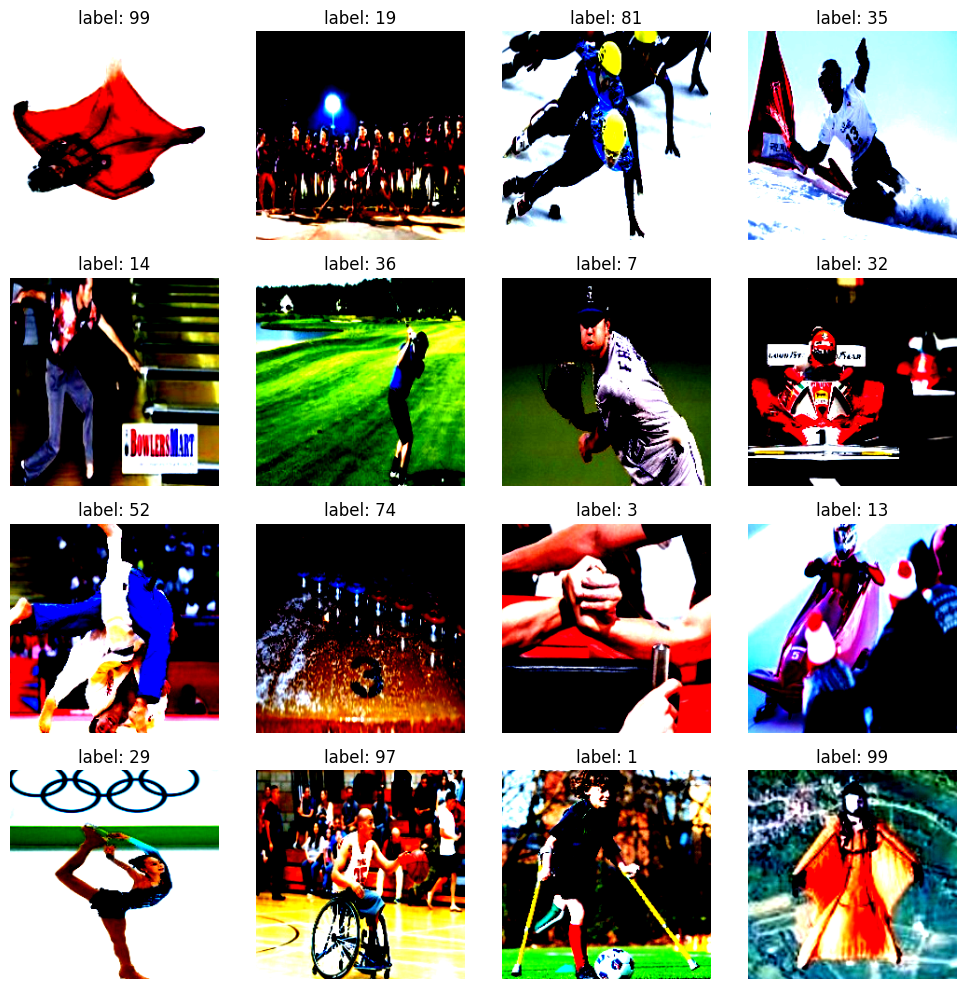

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision
#loop through the training dataloader to get a batch

for images, labels in train_loader:
  break  # get the first batch and exit loop

# convert the images into numpy arrays
images = images.numpy()

#plot the images

fig,axes = plt.subplots(nrows = 4,ncols = 4,figsize= (10,10))
for i, ax in enumerate(axes.flat):
    # display the image
    ax.imshow(np.transpose(images[i],(1,2,0)))
    ax.set_title(f"label: {labels[i].item()}")
    ax.axis('off')

plt.tight_layout()

plt.show()

In [44]:
print(x.shape)

torch.Size([3, 224, 224])


In [55]:
from PIL import Image

# Load and preprocess the image
image_path = "/content/drive/MyDrive/Colab_Notebooks/cv_handson/test/fencing/2.jpg"
image = Image.open(image_path).convert('RGB')

# Apply the same transform used during training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # Add normalization if your pretrained model needs it:
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


input_tensor = transform(image).unsqueeze(0)  # [1, 3, 224, 224]

# Predict
model.eval()
with torch.no_grad():
    pred = model(input_tensor)
    predicted_class = classes[pred[0].argmax().item()]  # Get class name

print(f"Predicted: {predicted_class}")


Predicted: fencing


In [57]:
actual_class = "fencing"
print(f"Predicted: {predicted_class}, Actual: {actual_class}")


Predicted: fencing, Actual: fencing


In [58]:
from PIL import Image

# Load and preprocess the image
image_path = "/content/drive/MyDrive/Colab_Notebooks/cv_handson/test/football/4.jpg"
image = Image.open(image_path).convert('RGB')

# Apply the same transform used during training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # Add normalization if your pretrained model needs it:
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


input_tensor = transform(image).unsqueeze(0)  # [1, 3, 224, 224]

# Predict
model.eval()
with torch.no_grad():
    pred = model(input_tensor)
    predicted_class = classes[pred[0].argmax().item()]  # Get class name

print(f"Predicted: {predicted_class}")


Predicted: shot put


In [59]:
actual_class = "football"
print(f"Predicted: {predicted_class}, Actual: {actual_class}")


Predicted: shot put, Actual: football


In [63]:
from PIL import Image

# Load and preprocess the image
image_path = "/content/drive/MyDrive/Colab_Notebooks/cv_handson/test/swimming/4.jpg"
image = Image.open(image_path).convert('RGB')

# Apply the same transform used during training
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # Add normalization if your pretrained model needs it:
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])


input_tensor = transform(image).unsqueeze(0)  # [1, 3, 224, 224]

# Predict
model.eval()
with torch.no_grad():
    pred = model(input_tensor)
    predicted_class = classes[pred[0].argmax().item()]  # Get class name

print(f"Predicted: {predicted_class}")


Predicted: hockey


In [64]:
actual_class = "swimming"
print(f"Predicted: {predicted_class}, Actual: {actual_class}")


Predicted: hockey, Actual: swimming
